# Tree Models
### Author: Jainam Mehta

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data and prepare it for the RandomForest Model

In [2]:
# Load the data
df = pd.read_csv("Data/data.csv")
df.head()

,id,hos2_is_superhos2,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,property_type,room_type,accommodates,...,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2595,1,6,Midtown,Manhattan,New York,10018,Apartment,Entire home/apt,1,...,1125.0,48,7,94,9,9,10,10,10,9
1,3831,1,1,Clinton Hill,Brooklyn,Brooklyn,11238,Guest suite,Entire home/apt,3,...,730.0,295,75,90,9,9,10,9,10,9
2,5099,1,1,Murray Hill,Manhattan,New York,10016,Apartment,Entire home/apt,2,...,21.0,78,8,90,10,9,10,10,10,9
3,5178,1,1,Hell's Kitchen,Manhattan,New York,10019,Apartment,Private room,2,...,14.0,454,47,84,9,7,9,9,10,8
4,5238,2,4,Chinatown,Manhattan,New York,10002,Apartment,Entire home/apt,3,...,1125.0,161,9,94,10,9,10,10,9,9


In [3]:
# Descriptive statistics for each column
df.describe()

,id,hos2_is_superhos2,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,...,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.826800e+04,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000,...,2.826800e+04,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000,28268.000000
mean,2.298458e+07,1.312509,8.427268,2.953976,1.134339,1.186819,1.600255,129.525647,1.641326,5.757677,...,1.038668e+04,39.998054,16.066648,94.032510,9.636939,9.328216,9.759764,9.751097,9.609276,9.395323
std,1.215285e+07,0.463524,56.331599,1.870513,0.391389,0.722178,1.146669,85.643423,1.212901,15.842635,...,6.733807e+05,56.912793,18.678909,8.043051,0.793117,0.974955,0.681790,0.722382,0.695249,0.877691
min,2.595000e+03,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,...,1.000000e+00,1.000000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.364244e+07,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,68.000000,1.000000,1.000000,...,2.900000e+01,5.000000,3.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.502626e+07,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,100.000000,1.000000,2.000000,...,3.650000e+02,17.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.361199e+07,2.000000,3.000000,4.000000,1.000000,1.000000,2.000000,168.000000,2.000000,4.000000,...,1.125000e+03,51.000000,24.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.051312e+07,2.000000,1767.000000,16.000000,7.000000,21.000000,26.000000,500.000000,16.000000,1125.000000,...,4.948122e+07,675.000000,407.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [4]:
# drop unecessary columns
df = df.drop(['neighbourhood_cleansed', 'city', 'zipcode', 'security_deposit', 'cleaning_fee', 'extra_people'], axis=1)
df.columns

Index(['id', 'hos2_is_superhos2', 'host_listings_count',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'guests_included', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

In [5]:
# split up amenities


# for now ignore amenities
df = df.drop('amenities', axis=1)
df.columns

Index(['id', 'hos2_is_superhos2', 'host_listings_count',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

In [6]:
# Split data into dependent and predictor variables
y = df['price']
print(y.head())

X = df.drop('price', axis=1)
X.head()

0    225
1     89
2    200
3     79
4    150
Name: price, dtype: int64


,id,hos2_is_superhos2,host_listings_count,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2595,1,6,Manhattan,Apartment,Entire home/apt,1,1.0,0,1,...,1125.0,48,7,94,9,9,10,10,10,9
1,3831,1,1,Brooklyn,Guest suite,Entire home/apt,3,1.0,1,4,...,730.0,295,75,90,9,9,10,9,10,9
2,5099,1,1,Manhattan,Apartment,Entire home/apt,2,1.0,1,1,...,21.0,78,8,90,10,9,10,10,10,9
3,5178,1,1,Manhattan,Apartment,Private room,2,1.0,1,1,...,14.0,454,47,84,9,7,9,9,10,8
4,5238,2,4,Manhattan,Apartment,Entire home/apt,3,1.0,1,2,...,1125.0,161,9,94,10,9,10,10,9,9


In [7]:
# one-hot encode the data 
X = pd.get_dummies(X)
predictor_list = X.columns.tolist()

# check the columns have been dummified
X.iloc[:, 25:35].head(10)

,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat
0,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0
3,0,0,1,0,0,0,1,0,0,0
4,0,0,1,0,0,0,1,0,0,0
5,0,0,1,0,0,0,1,0,0,0
6,0,1,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,1,0,0,0
8,0,0,1,0,0,0,1,0,0,0
9,0,1,0,0,0,0,0,0,0,0


In [8]:
# check dimensions
print(y.shape)
X.shape

(28268,)


(28268, 68)

### Create train/test split

In [9]:
# covert to numpy arrays
y = np.array(y)
X = np.array(X)

In [10]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size = 0.7, random_state = 123)

In [11]:
# check dimensions of resulting split
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (19787, 68)
Training Labels Shape: (19787,)
Testing Features Shape: (8481, 68)
Testing Labels Shape: (8481,)


### Training the model

In [12]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 123)

# Train the model on training data
rf.fit(X_train, y_train);

### Generating predictions on the test set

In [13]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print(round(np.mean(errors), 2))

34.68


In [14]:
errors

array([139.173,  65.01 ,  50.414, ...,   4.324,  29.681,   1.304])

In [15]:
# Performance metrics

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

# Calculate R2 value


Accuracy: 69.2 %.


### Interpreting the model and results

In [17]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(predictor_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: room_type_Entire home/apt Importance: 0.33
Variable: bathrooms            Importance: 0.08
Variable: id                   Importance: 0.07
Variable: neighbourhood_group_cleansed_Manhattan Importance: 0.07
Variable: bedrooms             Importance: 0.06
Variable: accommodates         Importance: 0.04
Variable: number_of_reviews    Importance: 0.04
Variable: number_of_reviews_ltm Importance: 0.03
Variable: review_scores_rating Importance: 0.03
Variable: host_listings_count  Importance: 0.02
Variable: guests_included      Importance: 0.02
Variable: review_scores_location Importance: 0.02
Variable: hos2_is_superhos2    Importance: 0.01
Variable: beds                 Importance: 0.01
Variable: minimum_nights       Importance: 0.01
Variable: maximum_nights       Importance: 0.01
Variable: minimum_minimum_nights Importance: 0.01
Variable: maximum_minimum_nights Importance: 0.01
Variable: minimum_maximum_nights Importance: 0.01
Variable: maximum_maximum_nights Importance: 0.01
Variab

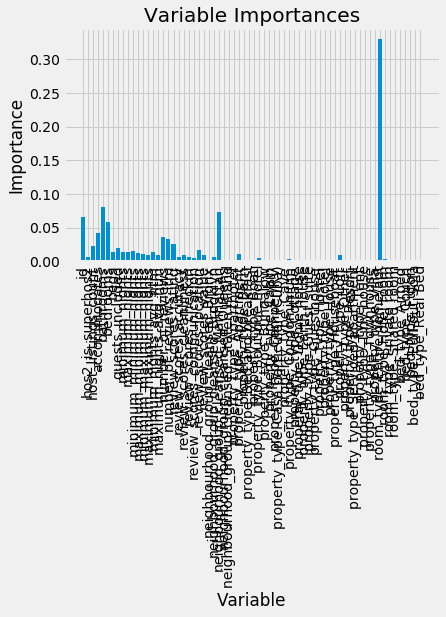

In [18]:
# Plot out importances

# Import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, predictor_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
# Plot predictions vs actual, grouped by location

In [ ]:
# Plot predictions vs actual, grouped by room type

In [25]:
# Visualizing a single tree

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = predictor_list, rounded = True, precision = 1)



FileNotFoundError: [WinError 2] "dot" not found in path.

In [26]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')


In [ ]:
# Write graph to a png file
graph.write_png('tree.png')